# Import Python Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns #visualisation
import sklearn   # scientifical tools of machine learning
import matplotlib.pyplot as plt  ##visualisation
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=[10,5]
#set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore" , category = FutureWarning)



# 1.Visualisation

# Loading Data

In [2]:
full_data = pd.read_csv("/content/titanic_dataset (1).csv")

In [3]:
full_data.shape

(891, 12)

In [4]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Unsderting the data of visualisation

1.Displot

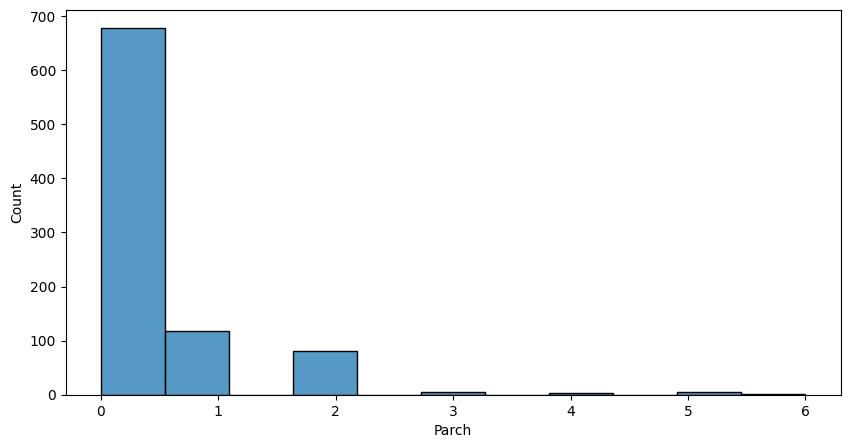

In [5]:
sns.histplot(full_data['Parch'],kde=False)
plt.show()

# 2.2. kdeplot

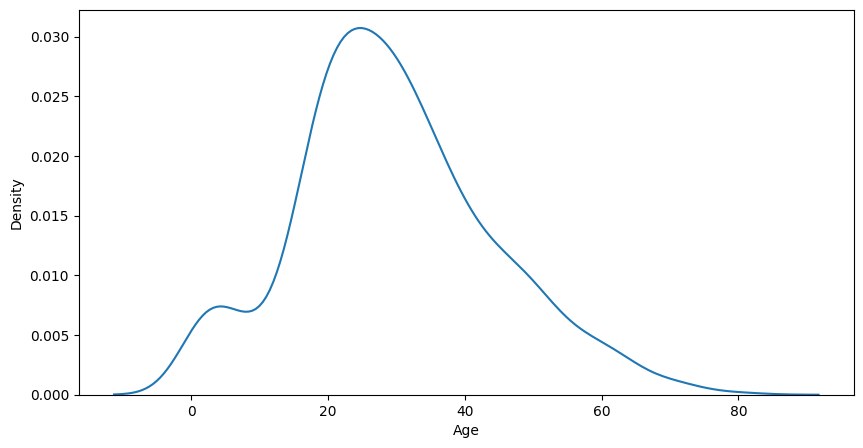

In [6]:
sns.distplot(full_data['Age'], hist = False  )
plt.show()

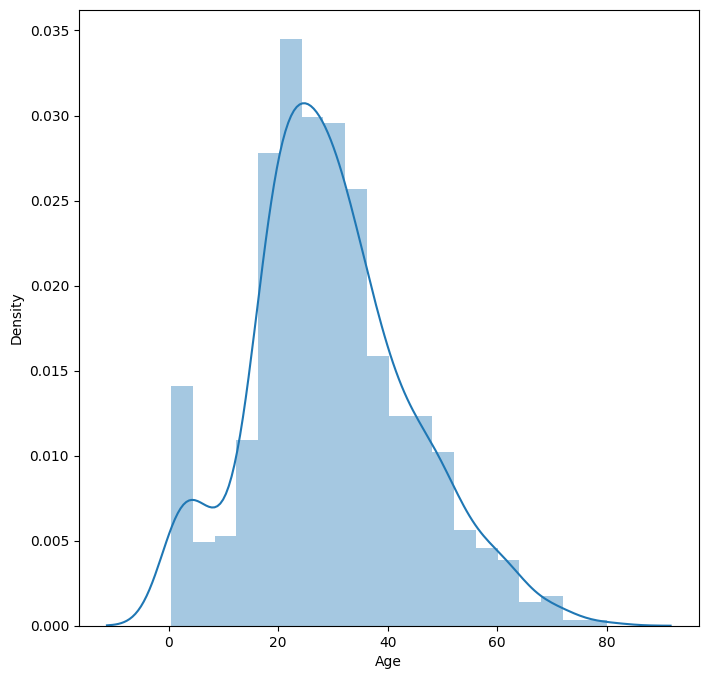

In [7]:
plt.figure(figsize=(8,8))
sns.distplot(full_data['Age'])
plt.show()

# relplot

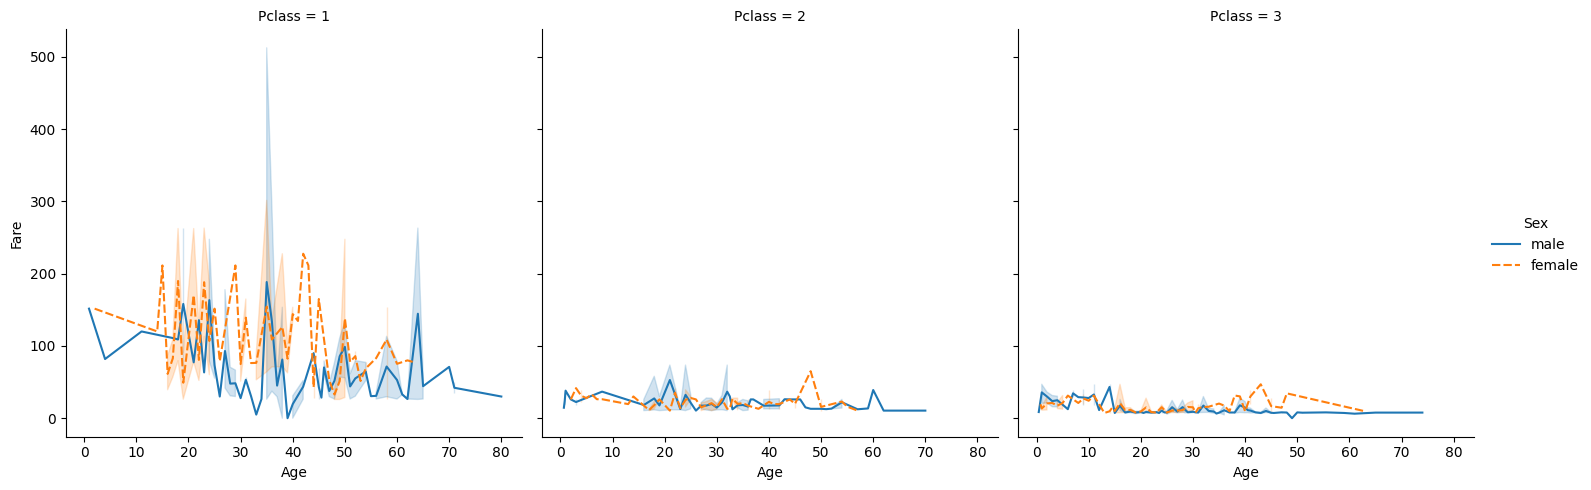

In [8]:
sns.relplot(x='Age',y='Fare',col='Pclass', hue='Sex',style='Sex',kind='line',data=full_data) #scatter can be used instead "line" plot
plt.show()

# scatterplot

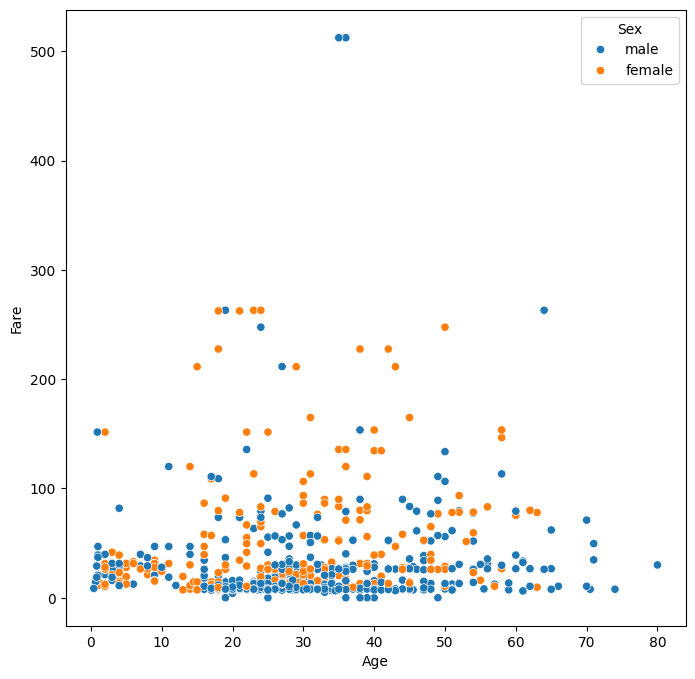

In [9]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='Fare', hue='Sex',data=full_data)
plt.show()

# lineplot

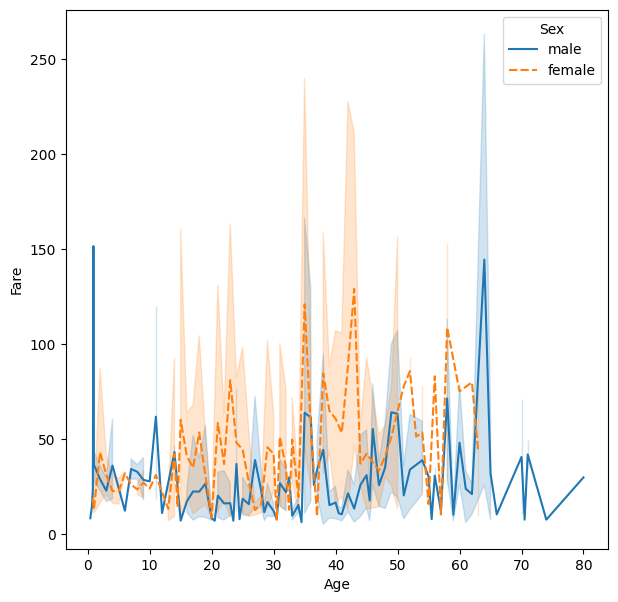

In [10]:
plt.figure(figsize=(7,7))
sns.lineplot(x='Age',y='Fare',hue='Sex',style='Sex', data=full_data)
plt.show()

 **barplot**

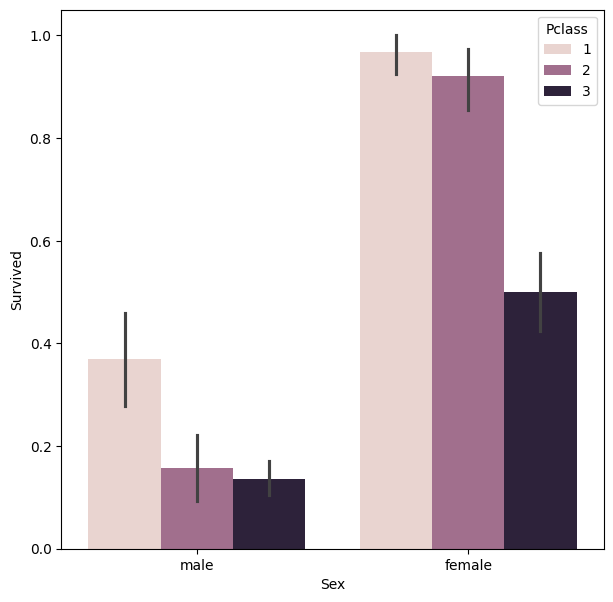

In [11]:
plt.figure(figsize=(7,7))
sns.barplot(x="Sex",y="Survived",hue="Pclass",data= full_data)
plt.show()

# stripplot

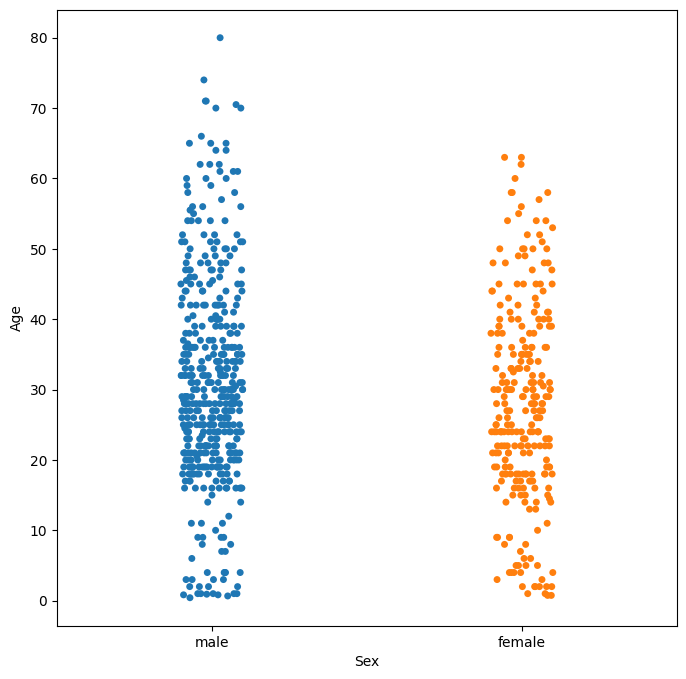

In [12]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex",y="Age",hue='Sex',data=full_data)
plt.show()

# swarmplot

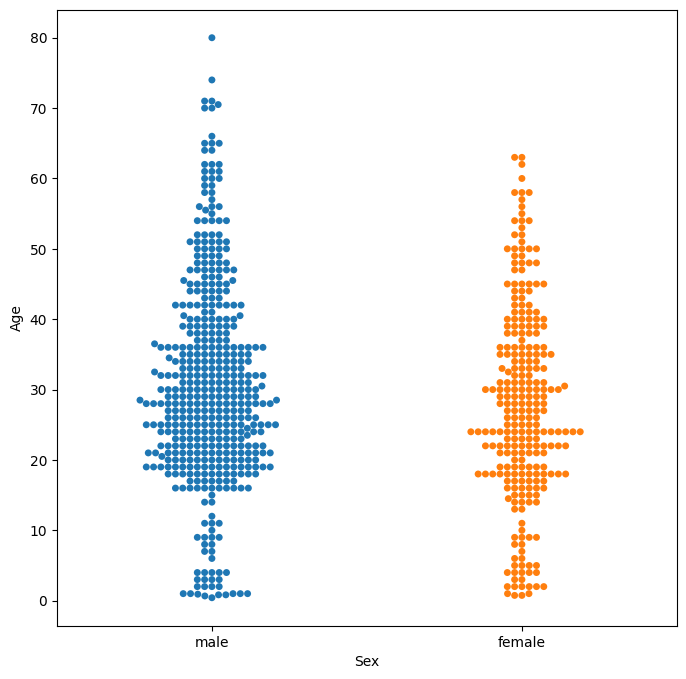

In [13]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex",y="Age",hue='Sex',data=full_data)
plt.show()

# boxplot

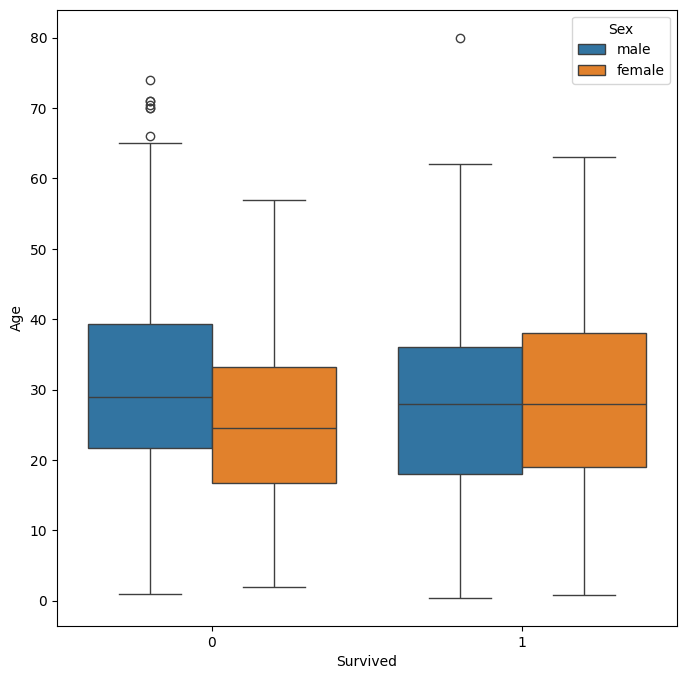

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived",y="Age",hue='Sex',data=full_data)
plt.show()

# violinplot

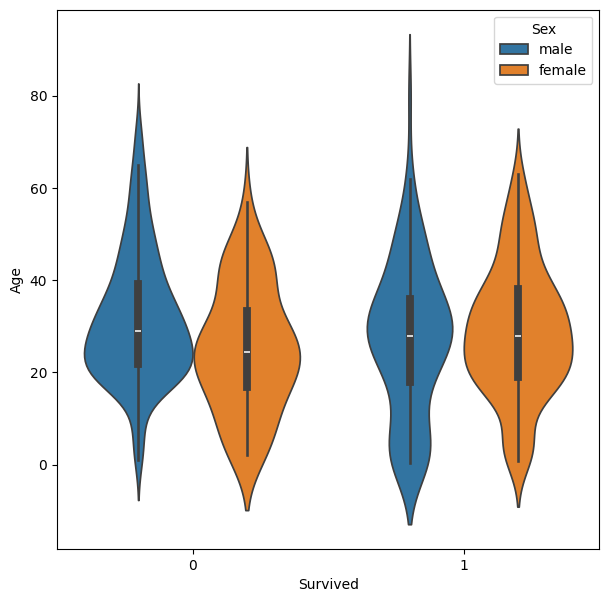

In [15]:
plt.figure(figsize=(7,7))
sns.violinplot(x="Survived",y="Age",hue='Sex',data=full_data)
plt.show()

# countplot

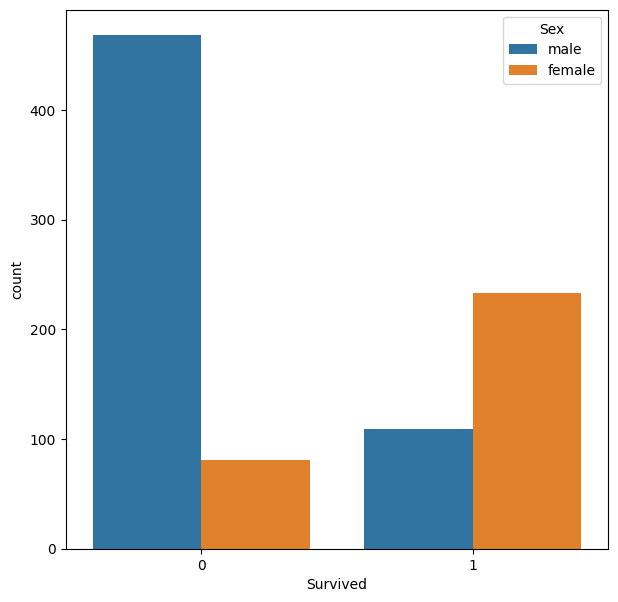

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(x="Survived" ,hue='Sex',data=full_data)
plt.show()

# pointplot

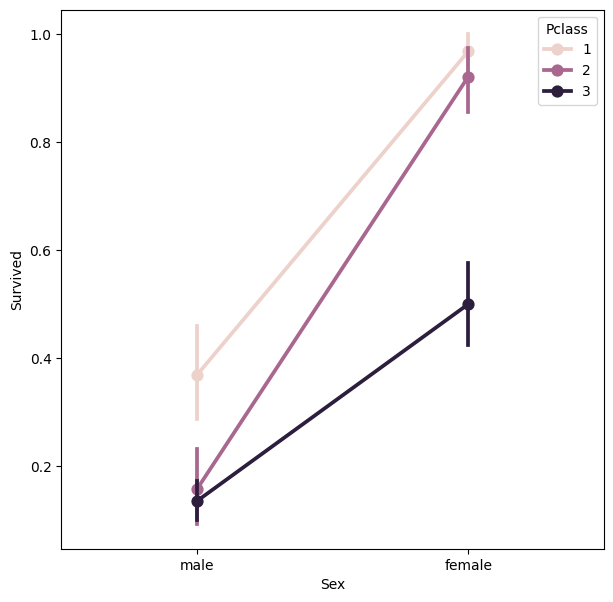

In [17]:
plt.figure(figsize=(7,7))
sns.pointplot(x="Sex",y="Survived",hue='Pclass',data=full_data)
plt.show()

**Plot says that, the number of passengers in the third class are higher than first and second class.**

[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "Regression"></a>
## 5. Regression plots
Most of the times, we use datasets that contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. This can be done through the ***regression lines***.

While building the regression models, we often check for ***multicollinearity***, where we had to see the correlation between all the combinations of continuous variables and will take necessary action to remove multicollinearity if exists.

There are two main functions in Seaborn to visualize a linear relationship determined through regression. These functions are `regplot()` and `lmplot()`.
<a id = "lmplot"></a>
### 5.1. lmplot
**lmplot** has data as a required parameter and the x and y variables must be specified as strings. This data form at is called ***“long -form ”*** data

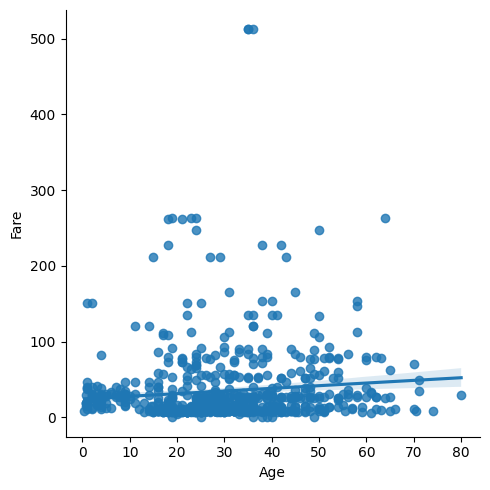

In [18]:
sns.lmplot(x="Age",y="Fare",data=full_data)
plt.show()

<a id = "regplot"></a>
### 5.2. regplot
**regplot** accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame.

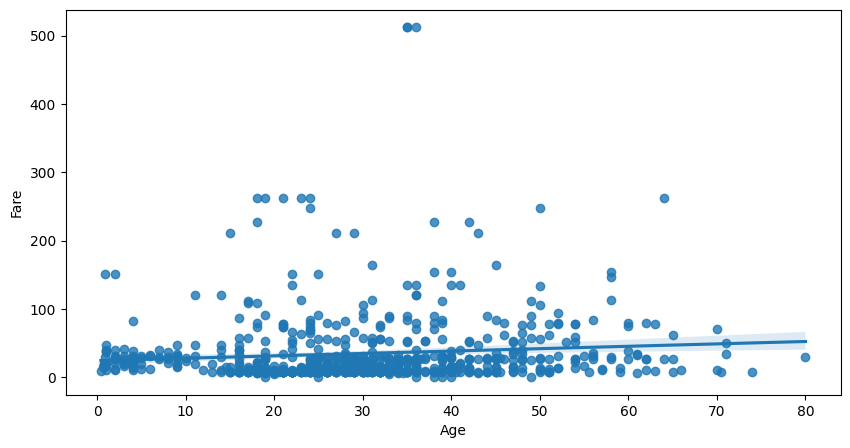

In [19]:
sns.regplot(x="Age",y="Fare",data=full_data)
plt.show()

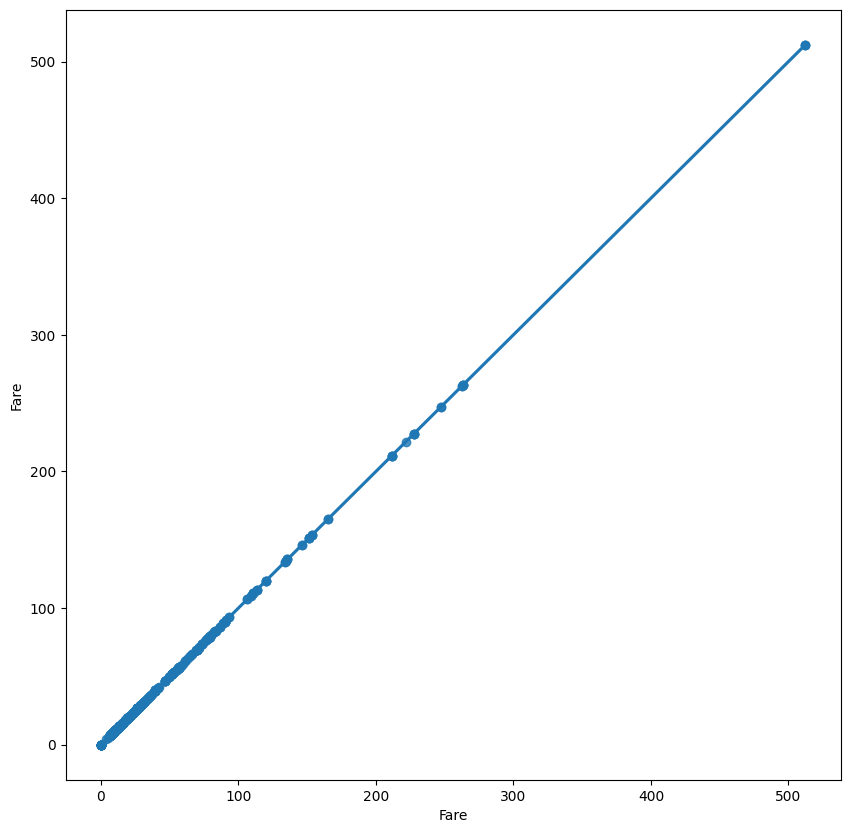

In [20]:
plt.subplots(figsize=(10,10))
sns.regplot(x="Fare",y="Fare",data=full_data)
plt.show()

# 6. Matrix plots

6.1. heatmap
Visualizing data with heatmaps is a great way to do exploratory data analysis, when you have a data set with multiple variables. Heatmaps can reveal general pattern in the dataset, instantly. And it is very easy to make beautiful heatmaps with Seaborn library in Python.

Now let's plot the correlation matrix of our data with a heatmap.

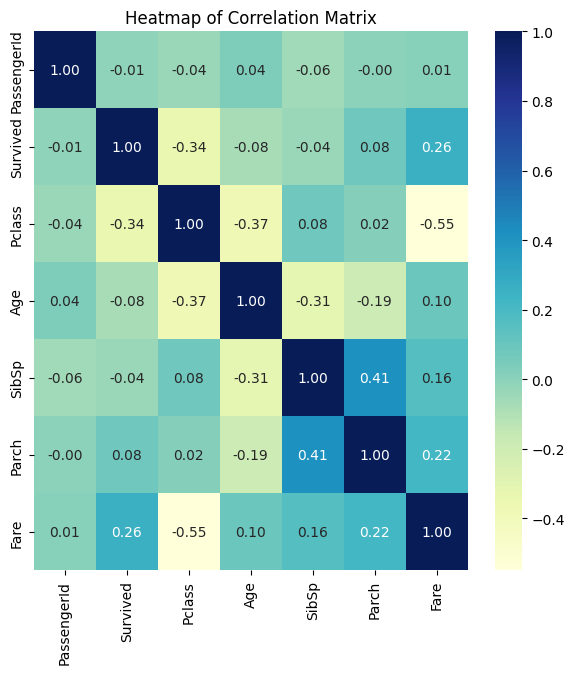

In [21]:
plt.subplots(figsize=(7, 7))
sns.heatmap(full_data.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()

# 7. Multi-plot grids

7.1. Facet grids
A useful approach to explore medium-dimensional data, is by drawing multiple instances of the same plot on different subsets of your dataset. This technique is commonly called as “lattice”, or “trellis” plotting, and it is related to the idea of “small multiples”. To use these features, your data has to be in a Pandas DataFrame.

Facet grid forms a matrix of panels defined by row and column by dividing the variables. Due of panels, a single plot looks like multiple plots. It is very helpful to analyze all combinations in two discrete variables.

FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid. The variables should be categorical and the data at each level of the variable will be used for a facet along that axis.

The advantage of using Facet is, we can input another variable into the plot. We can make many column facets and align them with the rows of the grid:

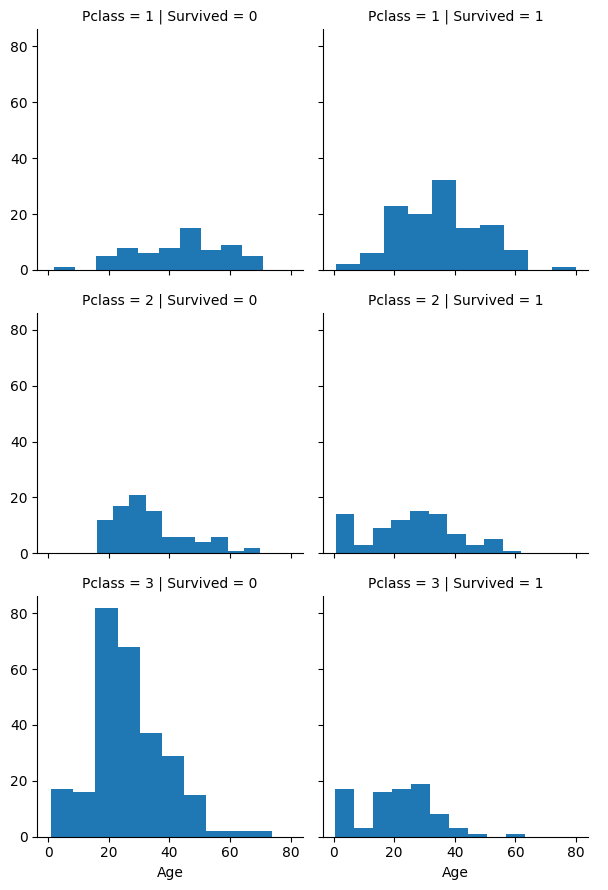

In [22]:
# initialize the FacetGrid object
g = sns.FacetGrid(full_data, col='Survived', row='Pclass')

g.map(plt.hist, 'Age')
g.add_legend()
plt.show()

#2. Data pre-processing
We have addresses some point for training:

1.Data Shape

2.Incorrect data tpyes

3.Missing Values

3.Outliers

4.Categorical variables

In [23]:
full_data =pd.read_csv("/content/titanic_dataset (1).csv")

In [24]:
full_data.shape

(891, 12)

In [25]:

# Data shape
print('train data:',full_data.shape)

train data: (891, 12)


In [26]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#data information
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Missing Data**

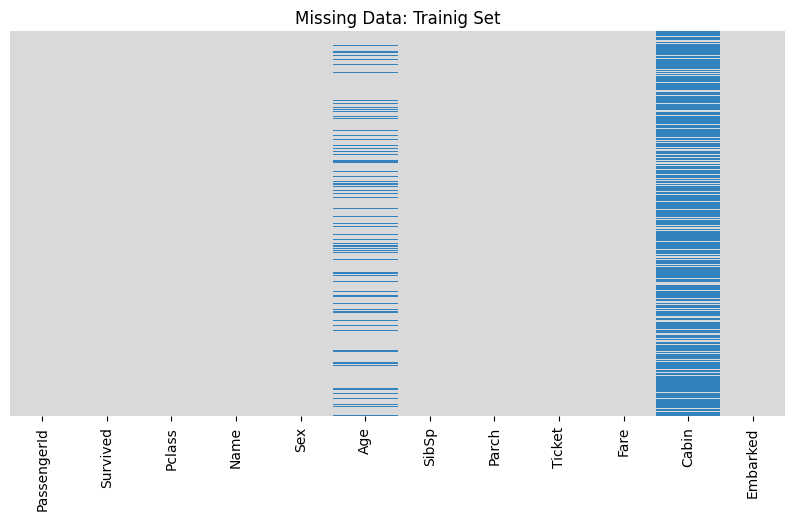

In [28]:
#using Heatmap remove the missing values
sns.heatmap(full_data.isnull(), yticklabels=False ,cbar=False,cmap="tab20c_r")
plt.title('Missing Data: Trainig Set')
plt.show()

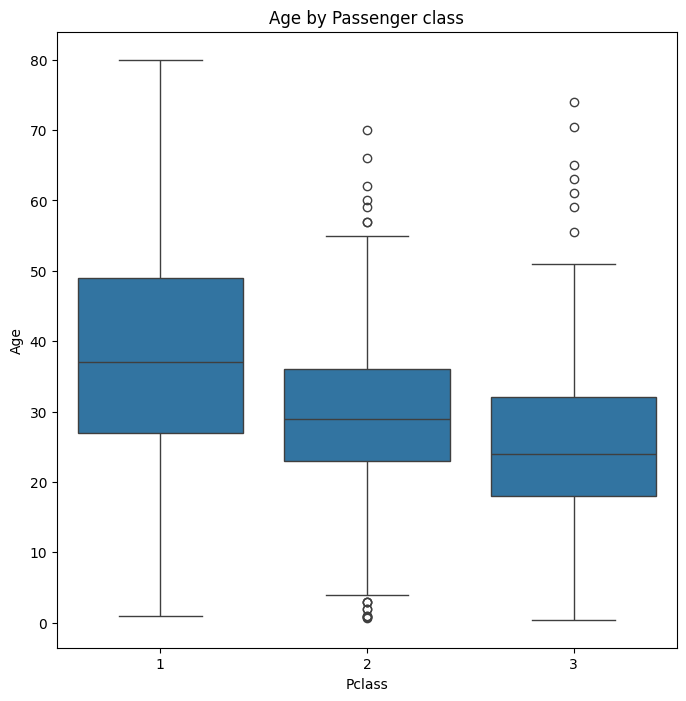

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Pclass',y= 'Age', data= full_data)
plt.title("Age by Passenger class")
plt.show()

In [30]:
 #Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
full_data['Age']=full_data[['Age','Pclass']].apply(impute_age, axis =1 )

In [31]:
# Remove Cabin feature
full_data.drop('Cabin', axis = 1, inplace = True)

In [32]:
# Remove Cabin feature
full_data.dropna(inplace = True)

In [33]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [34]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Now drope the colunms of Name and ticket which gives no useful information

In [35]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [36]:
#Remove unnecessary columns
full_data.drop(['Name','Ticket'], axis= 1 , inplace= True)

#Convert object into category datatpye
objact = ['Sex','Embarked']

for colname in objact:
  full_data[colname]= full_data[colname].astype('category')



In [37]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


## PassengerId can be removed from the dataset because it does not add any useful information in predicting a passenger's survival. The remaining variables are the correct data type.

In [38]:
#numeric summary
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


# GETTING MODEL READY
Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [40]:
# Shape of train data
full_data.shape

(889, 9)

In [41]:
# Identify categorical features
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [42]:
# Convert categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(full_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(full_data['Embarked'], drop_first = True)

In [43]:
full_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [44]:
# Add new dummy columns to data frame
full_data = pd.concat([full_data, sex, embarked], axis = 1)
full_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [45]:
# Drop unecessary columns
full_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',full_data.shape)

# Confirm changes
full_data.head()

train_data shape (889, 10)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Now the train data is perfect for a machine learning algorithm:


all the data is numeric

everything is concatenated together

# OBJECTIVE 2: MACHINE LEARNING

Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit,** Predict, Score It.


# Target Variable Splitting
We will spilt the Full dataset into Input and target variables

# Input is also called Feature Variables Output referes to Target variables

In [46]:
x =full_data.drop("Survived",axis=1)
#creat target variable
y =full_data['Survived']


In [47]:
# x resprent feature
x.shape

(889, 9)

In [48]:
# y resprent target variable
y.shape

(889,)

In [49]:
from sklearn import preprocessing
pre_processing= preprocessing.StandardScaler().fit(x)
x_transform=pre_processing.fit_transform(x)


In [50]:
 #Use x and y variables to split the training data into train and test set
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=100)

In [51]:
x_train.shape
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
777,778,3,5.0,0,0,12.4750,0,0,1
782,783,1,29.0,0,0,30.0000,1,0,1
708,709,1,22.0,0,0,151.5500,0,0,1
153,154,3,40.5,0,2,14.5000,1,0,1
563,564,3,24.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
857,858,1,51.0,0,0,26.5500,1,0,1
873,874,3,47.0,0,0,9.0000,1,0,1
837,838,3,24.0,0,0,8.0500,1,0,1
793,794,1,37.0,0,0,30.6958,1,0,0


In [52]:
y_train.shape
y_train


777    1
782    0
708    1
153    0
563    0
      ..
857    1
873    0
837    0
793    0
521    0
Name: Survived, Length: 711, dtype: int64

In [53]:
x_test.shape
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
639,640,3,24.0,1,0,16.1000,1,0,1
147,148,3,9.0,2,2,34.3750,0,0,1
278,279,3,7.0,4,1,29.1250,1,1,0
484,485,1,25.0,1,0,91.0792,1,0,0
770,771,3,24.0,0,0,9.5000,1,0,1
...,...,...,...,...,...,...,...,...,...
222,223,3,51.0,0,0,8.0500,1,0,1
491,492,3,21.0,0,0,7.2500,1,0,1
266,267,3,16.0,4,1,39.6875,1,0,1
709,710,3,24.0,1,1,15.2458,1,0,0


# 1. **LOGISTIC** REGRESSION
# Model Training

In [55]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

# **Model Evaluation**

# Logistic regression

In [62]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
#Score it

print('Logistic Regression')
#Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test,y_pred_log_reg)*100,2)
print('Accuracy',log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 82.02 %


# Decision Tree

# Evalution model

In [66]:
# Import model
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree=DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

In [70]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
#Score it

print('Decision Tree Classifier')
#Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test,y_pred_Dtree)*100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 74.72 %


# . Random Forest

# Model training

In [72]:
 #Import model
from sklearn.ensemble import RandomForestClassifier

print('RandomForestClassifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

RandomForestClassifier


RandomForestClassifier()

In [74]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
#Score it

print('Decision Tree Classifier')
#Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test,y_pred_rfc)*100,2)
print('Accuracy', rfc_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 83.15 %


# Gradient Bossting Classifier

# Model Evalution

In [76]:
#Import model
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

In [77]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
#Score it

print('Gradient Boosting Classifier')
#Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test,y_pred_gbc)*100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 84.83 %


In [78]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (Greater Values are better):
1. Gradient Boosting Classifier: 84.83
2. Random Forest Classifier: 83.15
3. Logistic Regression: 82.02
4. Decision Tree Classifier: 74.72
